# Рынок заведений общественного питания Москвы

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
Наша задача подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.</br>
Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

**План:**
1. [Загрузка данных и изучение общей информации.](#section_id_1)<br>
* 1.1. Загрузить данные, изучить общую информацию. <br>
* 1.2. Определить сколько заведений представлено в датасете.
2. [Предобработка данных.](#section_id_2)<br>
* 2.1. Посчитать количество дубликатов в данных. <br>
* 2.2. Посчитать количество пропусков. <br>
* 2.3. Аномальные значения в 'middle_coffee_cup' и 'middle_avg_bill'.<br>
* 2.4. Cоздать столбец 'street' с названиями улиц из столбца с адресом. <br>
* 2.5. Создать столбец 'is_24/7' с обозначением, что заведение работает ежедневно и круглосуточно (24/7).
3. [Анализ данных.](#section_id_3)<br>
* 3.1. Ответить на вопрос - какие категории заведений представлены в данных? Исследовать количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построить визуализации. Ответить на вопрос о распределении заведений по категориям. <br>
* 3.2. Исследовать количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построить визуализации. Проанализировать результаты и сделать выводы. <br>
* 3.3. Рассмотреть и изобразить соотношение сетевых и несетевых заведений в датасете. Ответить на вопрос - каких заведений больше? <br>
* 3.4. Ответить на вопрос - какие категории заведений чаще являются сетевыми? Исследовать данные и ответить на вопрос графиком. <br>
* 3.5. Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Построить подходящую для такой информации визуализацию. Ответить на вопросы - знакомы ли нам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся? <br>
* 3.6. Ответить на вопрос - какие административные районы Москвы присутствуют в датасете? Отобразить общее количество заведений и количество заведений каждой категории по районам. Попробовать проиллюстрировать эту информацию одним графиком. <br>
* 3.7. Визуализировать распределение средних рейтингов по категориям заведений. Ответить на вопрос - сильно ли различаются усреднённые рейтинги в разных типах общепита? <br>
* 3.8. Построить фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. <br>
* 3.9. Отобразить все заведения датасета на карте с помощью кластеров средствами библиотеки folium. <br>
* 3.10. Найти топ-15 улиц по количеству заведений. Построить график распределения количества заведений и их категорий по этим улицам. Попробовать проиллюстрировать эту информацию одним графиком. <br>
* 3.11. Найти улицы, на которых находится только один объект общепита. Ответить на вопрос - что можно сказать об этих заведениях? <br>
* 3.12. Посчитать медиану столбца middle_avg_bill для каждого района. Использовать это значение в качестве ценового индикатора района. Построить фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализировать цены в центральном административном округе и других. Ответить на вопрос - как удалённость от центра влияет на цены в заведениях? <br>
* 3.13. Сделать общий вывод по пункту.
4. [Детализация исследования: открытие кофейни.](#section_id_4)<br>
* 4.1. Ответим на вопросы: Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?<br>
* 4.2. Попробуем посмотерть есть ли круглосуточные кофейни в датасете.<br>
* 4.3. Определим какие у кофеен рейтинги и как кофейни распределяются по районам.<br>
* 4.4. Определим на какую стоимость чашки капучино стоит ориентироваться при открытии и почему.<br>
5. [Презентация.](#section_id_5)<br>
6. [Общий вывод.](#section_id_6)

**Описание данных.**<br>
* `name` — название заведения;<br>
* `address` — адрес заведения;<br>
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;<br>
* `hours` — информация о днях и часах работы;<br>
* `lat` — широта географической точки, в которой находится заведение;<br>
* `lng` — долгота географической точки, в которой находится заведение;<br>
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);<br>
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;<br>
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:<br>
   * «Средний счёт: 1000–1500 ₽»;<br>
   * «Цена чашки капучино: 130–220 ₽»;<br>
   * «Цена бокала пива: 400–600 ₽».<br>
и так далее;<br>
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:<br>
   * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.<br>
   * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.<br>
   * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт;<br>
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:<br>
   * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.<br>
   * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.<br>
   * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт;<br>
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):<br>
   * 0 — заведение не является сетевым,<br>
   * 1 — заведение является сетевым;<br>
* `district` — административный район, в котором находится заведение, например Центральный административный округ;<br>
* `seats` — количество посадочных мест.

## 1. Загрузка данных и изучение общей информации.<a id='section_id_1'></a>

**1.1. Откроем файл с данными и изучим общую информацию.**

In [54]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from folium import Map, Marker, Choropleth
from folium.plugins import MarkerCluster

In [2]:
try:
    datasets = pd.read_csv('/datasets/moscow_places.csv')
except: FilePathError
    
datasets.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Названия столбцов представлены корректно. Типы данных в столобцах не требуют изменений.

**1.2. Определим сколько заведений представлено в датасете.**

In [4]:
line = datasets['name'].nunique()
cafe = datasets.shape[0]
print(
    f'В представленной таблице {line} строк, которые описывают {cafe} заведений.')

В представленной таблице 5614 строк, которые описывают 8406 заведений.


## 2. Предобработка данных.<a id='section_id_2'></a>

**2.1. Посчитаем количество дубликато в данных.**

In [5]:
print('Число полных дубликатов - ', datasets.duplicated().sum())

Число полных дубликатов -  0


Найдём неявные дубликаты по двум столбцам: названию заведения и адресу.

In [6]:
datasets['address'] = datasets['address'].str.lower()
datasets['name'] = datasets['name'].str.lower()
datasets[datasets[['name','address']].duplicated(keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,0,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


Из получившейся таблицы мы видим, что пары, которые образовались, являются неявными дубликатами. Они незначительно отличаются по широте и долготе, что говорит о том, что вероятнее всего строчки описывают одно и то же место. <br>
Удалим неявные дублликаты.

In [7]:
datasets = datasets.drop(index=[215, 1511, 2420, 3109]).reset_index(drop=True)

**2.2. Посчитаем количество пропусков.**

In [8]:
datasets.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7867
middle_avg_bill      5253
price                5087
avg_bill             4586
seats                3610
hours                 535
name                    0
category                0
address                 0
district                0
lat                     0
lng                     0
rating                  0
chain                   0
dtype: int64

Больше всего пропусков скопилось в столбцах: <br>
* `middle_coffee_cup` (число с оценкой одной чашки капучино), <br>
* `middle_avg_bill` (число с оценкой среднего чека), <br>
* `price` (категория цен в заведении), <br>
* `avg_bill` (средняя стоимость заказа в виде диапазона). <br>

Чуть меньше в категориях: `seats` (количество посадочных мест), `hours` (информация о днях и часах работы).

Пропуски в `middle_coffee_cup` и `middle_avg_bill` объясняются отсутствием данных категорий в столбце `avg_bill`. Проверим это создав дубликат датафрейма с новым столбцом, который принимает значения `счёт`, если в `avg_bill` хранится средний счёт, значение `капучино`, если хранится цена чашки капучино, `пиво`, если указана цена бокала пива и `другое` при наличие других категорий или пропусков. 

In [9]:
datasets_1 = datasets

def categorize_bill(row):
    try:
        if 'счёт' in row:
            return 'счёт'
        elif 'чашки' in row:
            return 'капучино'
        elif 'пива' in row:
            return 'пиво'
    except:
        return 'другое'
    
datasets_1['type'] = datasets_1['avg_bill'].apply(categorize_bill)

In [10]:
other = len(datasets_1[datasets_1['type'] == 'другое'])
passes = datasets_1['avg_bill'].isna().sum()
print(
    f'Количество значений в категории другое - {other}, Количество пропусков в датафрейме {passes}')

Количество значений в категории другое - 4586, Количество пропусков в датафрейме 4586


Количество значений в категории `другое` оказались равными количеству пропусков и данных `avg_bill`. Это означает что других категорий, кроме озвученных в функции нет. Из этого следует что пропуски в данных `middle_coffee_cup` и `middle_avg_bill` должны объяснять друг друга.

In [11]:
avg_bill = len(datasets_1[datasets_1['type'] == 'счёт'])
cappuccino = len(datasets_1[datasets_1['type'] == 'капучино'])
beer = len(datasets_1[datasets_1['type'] == 'пиво'])
print(f'Средний счёт: {avg_bill}, Капучино: {cappuccino}, Пиво: {beer}')

Средний счёт: 3149, Капучино: 535, Пиво: 132


In [12]:
size = datasets_1.shape[0]
sum = other + avg_bill + cappuccino + beer
print(f'Размер датафрейма {size}, Сумма значений по всем категориям {sum}')

Размер датафрейма 8402, Сумма значений по всем категориям 8402


Размер датафрема и сумма значений по категориям оказались одинаковыми. Таким образом пропуски в `middle_coffee_cup` должны складываться из пропусков в `avg_bill` и количества категорий `счёт` и `пиво`. Аналогично пропуски в `middle_avg_bill` из пропусков в `avg_bill` и количества категорий `капучино` и `пиво`. Проверим это.

In [13]:
print(datasets_1['avg_bill'].isna().sum() + avg_bill + beer,
      datasets_1['middle_coffee_cup'].isna().sum())
print(datasets_1['avg_bill'].isna().sum() + cappuccino + beer,
      datasets_1['middle_avg_bill'].isna().sum())

7867 7867
5253 5253


In [14]:
datasets = datasets.drop(columns='type') 

**2.3. Аномальные значения.**

* Аномальные значения в `middle_coffee_cup`.

In [15]:
print(datasets['middle_coffee_cup'].max(), datasets['middle_coffee_cup'].min())

1568.0 60.0


In [16]:
datasets['middle_coffee_cup'].describe()

count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

In [17]:
datasets[datasets['middle_coffee_cup'] > 350]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2856,шоколадница,кофейня,"москва, большая семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,1,48.0
5499,coffee fm,кофейня,"москва, авиамоторная улица, 10, корп. 1",Юго-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–19:00",55.754233,37.715491,4.3,NaN,Цена чашки капучино:250–500 ₽,NaN,375.0,0,190.0


Аномальных значений в столбце средней цены чашки капучино не обнаружено. Необходимо только переписать строчку с индексом 2856, так как средняя цена взята некорректно. Произошла опечатка в столбце `avg_bill`.

In [18]:
datasets.loc[2856, 'avg_bill'] = datasets.loc[2856, 'avg_bill'].replace('Цена чашки капучино:230–2907 ₽',
                                                                        'Цена чашки капучино:230–290 ₽')
datasets.loc[2856, 'middle_coffee_cup'] = 260.0

* Аномальные значения в `middle_avg_bill`.

In [19]:
print(datasets['middle_avg_bill'].max(), datasets['middle_avg_bill'].min())

35000.0 0.0


In [20]:
datasets['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

In [21]:
datasets[datasets['middle_avg_bill'] < 50]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
3684,кофемания,кофейня,"москва, улица новый арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",55.752136,37.587784,4.5,высокие,Средний счёт:от 0 ₽,0.0,NaN,1,200.0
7541,шаурмян у арена,быстрое питание,"москва, краснодарская улица, 47",Юго-Восточный административный округ,"ежедневно, 09:00–23:00",55.677744,37.764810,3.3,NaN,Средний счёт:от 30 ₽,30.0,NaN,0,2.0


In [22]:
datasets[datasets['middle_avg_bill'] > 10000]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
729,чойхона,"бар,паб","москва, дмитровское шоссе, 95а",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0
7173,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,0,100.0


Средний счёт, равный 0 рублей - явно аномальное значение, но владельцы кофемании открыто публикуют такую цифру. Средний счёт более 10.000 рублей может показаться аномально большим, но такие рестораны имеют место быть. Не будем судить об аномальности в данной категории и оставим данные без изменения. 

**2.4. Cоздание столбца `street` с названиями улиц из столбца с адресом.**

In [23]:
datasets['address'].unique()

array(['москва, улица дыбенко, 7/1', 'москва, улица дыбенко, 36, корп. 1',
       'москва, клязьминская улица, 15', ...,
       'москва, улица лобачевского, 52, корп. 1',
       'москва, болотниковская улица, 52, корп. 2',
       'москва, чонгарский бульвар, 26а, корп. 1'], dtype=object)

In [24]:
datasets['street'] = datasets['address'].apply (lambda x: x.split(', ')[1])

**2.5. Создаём столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7).**

In [25]:
def categorize_hours(row):
    try:
        if 'ежедневно' in row and 'круглосуточно' in row:
            return True
    except:
        return False 
    
datasets['is_24/7'] = datasets['hours'].apply(categorize_hours)
datasets['is_24/7'] = datasets['is_24/7'].astype(bool)

In [26]:
datasets.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


## 3. Анализ данных.<a id='section_id_3'></a>

**3.1. Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации. Ответим на вопрос о распределении заведений по категориям.**

In [27]:
datasets['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

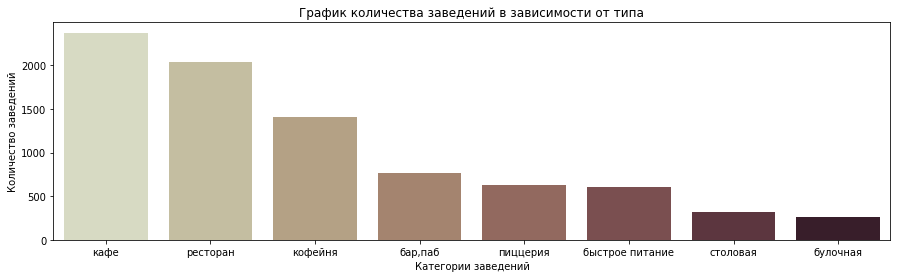

In [28]:
plt.figure(figsize=(15, 4))
sns.countplot(data=datasets, x='category', palette='ch:.50', 
             order=datasets.groupby('category')['chain'].agg('count').sort_values(ascending=False).index)
plt.title('График количества заведений в зависимости от типа')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.show();

Больше всего в нашем датафрейме представлено заведений-кафе, порядка 2.400. Немного меньше ресторанов - около 2.000, кофейнь - около 1400. Остальных категорий представлено меньше. Пиццерии, бары/пабы, заведения быстрого питания, булочные и столовые варьируются около значений 300-600 заведений.

**3.2. Исследуем количество посадочных мест в заведениях по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации. Проанализируем результаты и сделаем выводы.**

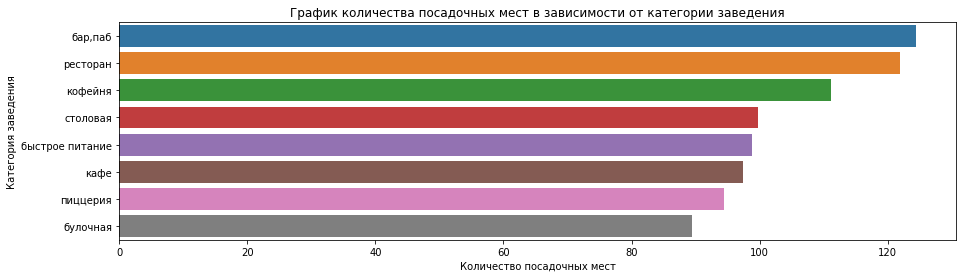

In [29]:
plt.figure(figsize=(15, 4))
sns.barplot(x='seats', y='category', data=datasets, 
            order=datasets.groupby('category')['seats'].agg('mean').sort_values(ascending=False).index,ci=None)
plt.title('График количества посадочных мест в зависимости от категории заведения')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория заведения')
plt.show()

Больше всего посадочных мест наблюдается в барах, пабах, кофейнях и ресторанах, около 115-120 мест. С остальных категориях мест поменьше, от 90 до 100.

**3.3. Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. Ответим на вопрос - каких заведений больше?**

In [30]:
pie_table = datasets.pivot_table(
            index='chain',
            values='name',
            aggfunc='count').reset_index()

pie_table

,chain,name
0,0,5199
1,1,3203


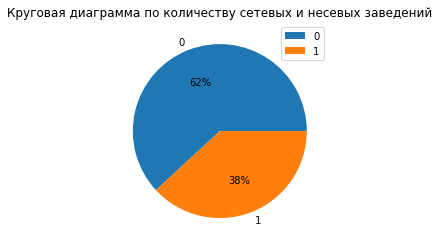

In [31]:
plt.figure(figsize=(4, 4))
plt.pie(labels = pie_table['chain'], x=pie_table['name'], autopct='%.0f%%')
plt.legend()
plt.title('Круговая диаграмма по количеству сетевых и несевых заведений')
plt.show();

На диаграмме видно, что несетевые заведения преобладают над сетевыми.

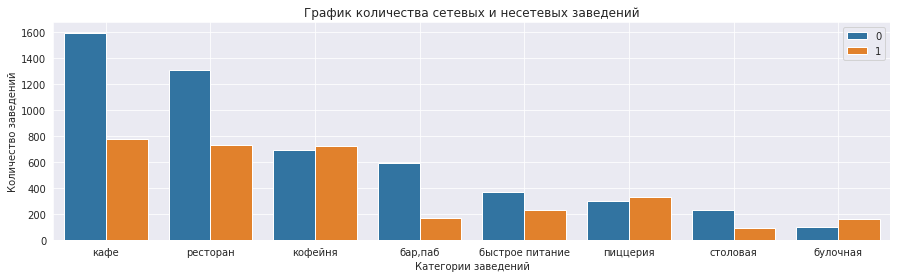

In [32]:
sns.set_style('dark')
plt.figure(figsize=(15, 4))
sns.countplot(x='category', data=datasets, hue='chain', 
              order=datasets.groupby('category')['name'].agg('nunique').sort_values(ascending=False).index)
plt.title('График количества сетевых и несетевых заведений')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

По графику можно сказать что несетевых заведений больше, чем сетевых практически в каждой категории.

**3.4. Ответим на вопрос - какие категории заведений чаще являются сетевыми? Исследуем данные и ответим на вопрос графиком.**

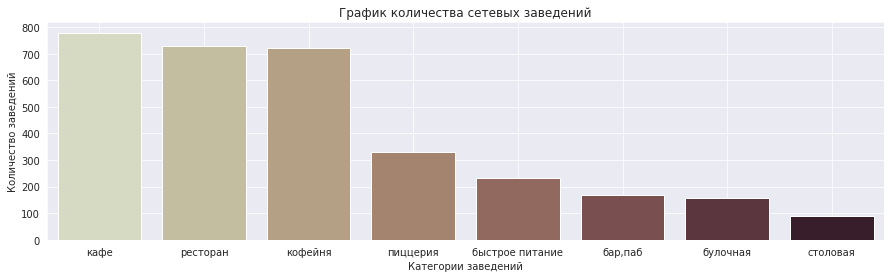

In [33]:
datasets_chain = datasets.query('chain == 1')
sns.set_style('dark')
plt.figure(figsize=(15, 4))
sns.countplot(x='category', data=datasets_chain, 
              order=datasets.groupby('category')['chain'].agg('sum').sort_values(ascending=False).index, palette='ch:.50')
plt.title('График количества сетевых заведений')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Чаще всего сетевыми заведениями являются кафе, рестораны и кофейни. Пицерии и заведения быстрого питания являются сетевыми гораздо реже. Сетевых баров, булочных и столовых почти не встретить.

**3.5. Сгруппируем данные по названиям заведений и найдём топ-15 популярных сетей в Москве. Построим подходящую для такой информации визуализацию. Ответим на вопросы: Знакомы ли нам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?**

In [34]:
table = datasets_chain.groupby('name').agg({'name':'count', 'category': pd.Series.mode})
table = table.rename(columns={'name':'count'})
table= table.sort_values(by='count', ascending=False).reset_index().head(15)
table

,name,count,category
0,шоколадница,120,кофейня
1,домино'с пицца,76,пиццерия
2,додо пицца,74,пиццерия
3,one price coffee,71,кофейня
4,яндекс лавка,69,ресторан
5,cofix,65,кофейня
6,prime,50,ресторан
7,хинкальная,44,кафе
8,кофепорт,42,кофейня
9,кулинарная лавка братьев караваевых,39,кафе


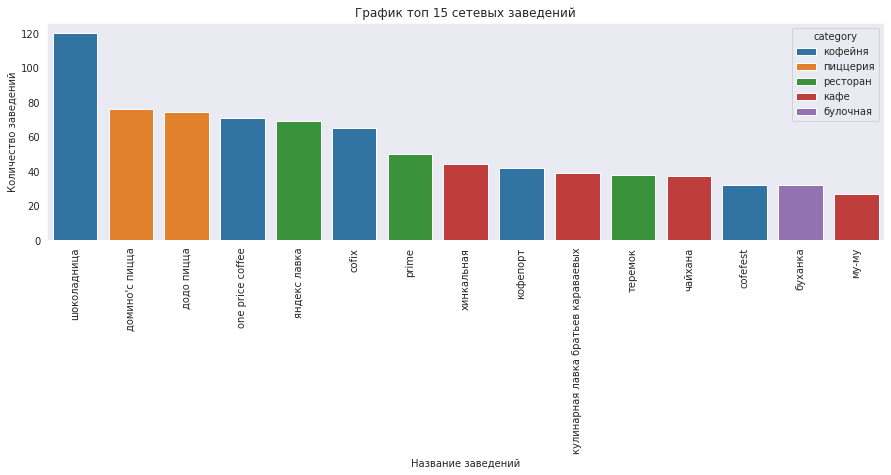

In [35]:
plt.figure(figsize=(15, 4))
sns.barplot(x='name', y='count', data=table, hue='category', dodge=False)
plt.title('График топ 15 сетевых заведений')
plt.xlabel('Название заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.show();

Наибольшей популярность в Москве пользуются кофейни, пиццерии и кафе. Шоколадница, доминос пицца, додо пицца и one price coffee являются самыми распространёнными. Выделенные сетевые заведения являются наиболее предпочтительным вариантом для посещения. Столовые, заведения быстрого питания и бары редко являются сетевыми и ещё реже будут наиболее предпочтительны для посещения для большинства москвичей.

**3.6. Ответим на вопрос - какие административные районы Москвы присутствуют в датасете? Отобразим общее количество заведений и количество заведений каждой категории по районам. Попробуем проиллюстрировать эту информацию одним графиком.**

In [36]:
table_district = datasets.pivot_table(
            index='district',
            columns='category',
            values='name',
            aggfunc='count')

table_district['count'] = table_district['бар,паб']+table_district['булочная']+table_district['быстрое питание']+\
                            table_district['кафе']+table_district['кофейня']+table_district['пиццерия']+\
                            table_district['ресторан']+table_district['столовая']
table_district = table_district.sort_values(by='count', ascending=False)
table_district = table_district.drop(columns='count') 
table_district

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Центральный административный округ,364,50,87,464,428,113,670,66
Северный административный округ,68,39,58,234,193,77,188,41
Южный административный округ,68,25,85,264,131,73,202,44
Северо-Восточный административный округ,62,28,82,269,159,68,182,40
Западный административный округ,50,37,62,238,150,71,218,24
Восточный административный округ,53,25,71,272,105,72,160,40
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Северо-Западный административный округ,23,12,30,115,62,40,109,18


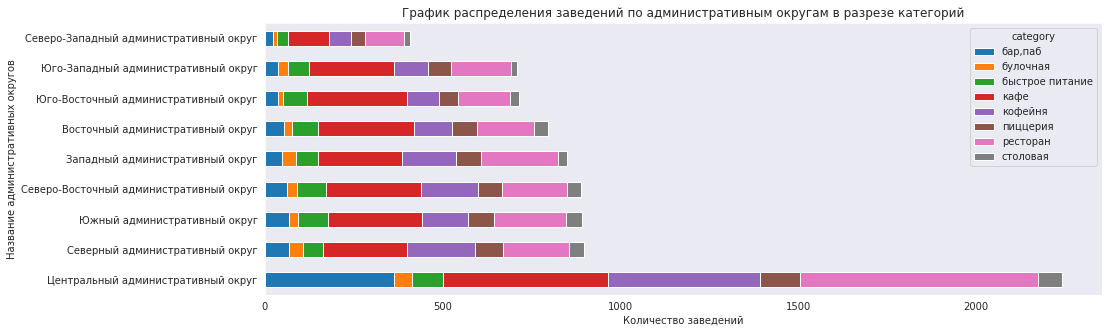

In [37]:
ax = table_district.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.title('График распределения заведений по административным округам в разрезе категорий')
plt.xlabel('Количество заведений')
plt.ylabel('Название административных округов');

В нашем датасете представлено 9 округов. Центральный админимтративный округ обладает наибольшим количеством заведений; Северо-Западный - наименьшим. Остальные округа обладают примерно одинаковым количеством мест общественного питания. По данным категорий можно сказать что они примерно одинаково распределены в каждом округе в процентном соотношении. Наибольшую область на графике заняли кафе, кофейни и рестораны.

**3.7. Визуализируем распределение средних рейтингов по категориям заведений. Ответим на вопрос - сильно ли различаются усреднённые рейтинги в разных типах общепита?**

In [38]:
table_rating= datasets.groupby('category').agg({'rating':'mean'}).reset_index()
table_rating['rating'] = round(table_rating['rating'],3)
table_rating = table_rating.sort_values(by='rating', ascending=False)
table_rating

,category,rating
0,"бар,паб",4.388
5,пиццерия,4.301
6,ресторан,4.290
4,кофейня,4.277
1,булочная,4.268
7,столовая,4.211
3,кафе,4.124
2,быстрое питание,4.050


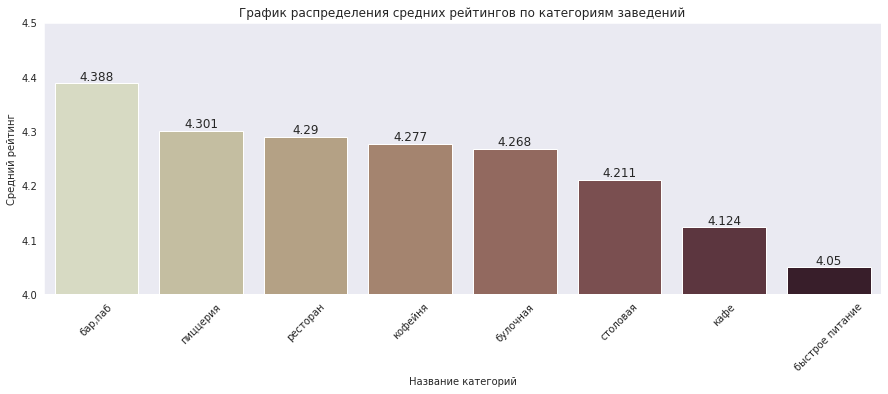

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='category', y='rating', data=table_rating, palette='ch:.50')
for i, val in enumerate(table_rating['rating'].values):
    plt.text(i, val, float(val), 
             horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.title('График распределения средних рейтингов по категориям заведений')
plt.xlabel('Название категорий')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.ylim(4, 4.5)
plt.show();

Средний рейтинг общепита Москвы различается не очень сильно. Бары и пабы имеют наибольший рейтинг, пицерии, рестораны, кофейни и булочные так же не сильно отстают. Столовые, кафе и заведения быстрого питания имеют рейтинг практически на 2-3 десятых едениц ниже.

**3.8. Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.**

In [52]:
rating_df = datasets.groupby('district', as_index=False)['rating'].agg('mean')
rating_df['rating'] = round(rating_df['rating'], 3)
rating_df.sort_values(by='rating', ascending=False)

,district,rating
5,Центральный административный округ,4.378
2,Северный административный округ,4.241
4,Северо-Западный административный округ,4.209
8,Южный административный округ,4.184
1,Западный административный округ,4.182
0,Восточный административный округ,4.174
7,Юго-Западный административный округ,4.173
3,Северо-Восточный административный округ,4.148
6,Юго-Восточный административный округ,4.101


In [ ]:
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по административным округам Москвы',
).add_to(m)

m

[![2023-09-12-21-23-11.png](https://i.postimg.cc/jSZcLwB3/2023-09-12-21-23-11.png)](https://postimg.cc/cvtwzHxf)

На хороплёте можно увидеть, что ЦАО имеет наибольший  рейтинг. САО и СЗАО имеют рейтинг примерно на 1 десятую долю меньше. ЗАО, ЮЗАО, ЮАО, ВАО и СВАО меньше предыдущих. ЮВАО имеет наименьший средний рейтинг среди всех административных округов Москвы.

**3.9. Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.**

In [ ]:
t = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
marker_cluster = MarkerCluster().add_to(t)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']}",
    ).add_to(marker_cluster)

datasets.apply(create_clusters, axis=1)

t

[![2023-09-12-21-26-45.png](https://i.postimg.cc/5NmTStZL/2023-09-12-21-26-45.png)](https://postimg.cc/GHHXcb3m)

С помощью кластеров отчётливо можно увидеть где сосредоточены заведения по карте Москвы.

**3.10. Найдём топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам. Проилюстрируем эту информацию одним графиком.**

In [40]:
table_street = datasets.pivot_table(
            index='street',
            columns='category',
            values='name',
            aggfunc='count')

table_street = table_street.fillna(0)
table_street['count'] = table_street['бар,паб']+table_street['быстрое питание']+table_street['кафе']\
                       +table_street['кофейня']+table_street['пиццерия']+table_street['ресторан']\
                       +table_street['столовая']+table_street['булочная']
table_street_15 = table_street.sort_values(by='count', ascending=False).head(15)
table_street_15

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,count
street,,,,,,,,,
проспект мира,11.0,4.0,21.0,53.0,36.0,11.0,45.0,2.0,183.0
профсоюзная улица,6.0,4.0,15.0,35.0,18.0,15.0,26.0,3.0,122.0
проспект вернадского,7.0,1.0,12.0,25.0,16.0,12.0,33.0,2.0,108.0
ленинский проспект,10.0,3.0,2.0,26.0,23.0,5.0,33.0,5.0,107.0
ленинградский проспект,15.0,4.0,2.0,12.0,25.0,9.0,25.0,3.0,95.0
дмитровское шоссе,6.0,2.0,10.0,23.0,11.0,8.0,24.0,4.0,88.0
каширское шоссе,2.0,0.0,10.0,20.0,16.0,5.0,19.0,5.0,77.0
варшавское шоссе,6.0,0.0,7.0,18.0,14.0,4.0,20.0,7.0,76.0
ленинградское шоссе,5.0,2.0,5.0,13.0,13.0,3.0,26.0,3.0,70.0


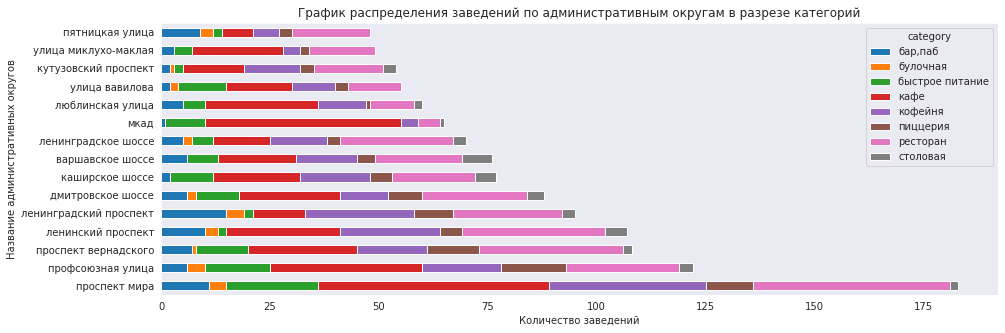

In [41]:
table_street_count = table_street_15.drop(columns='count')
ax = table_street_count.plot(kind='barh', stacked=True, figsize=(15, 5), alpha=1)
plt.title('График распределения заведений по административным округам в разрезе категорий')
plt.xlabel('Количество заведений')
plt.ylabel('Название административных округов');

На улице Проспект мира больше всего заведений, 183. На улицах Профсоюзная, Проспект Вернандского, Ленинский и Ленинградский проспект от 90 до 120 заведений. Категории распределены примерно равномерно на каждой из улиц. Рестораны, кафе и кофейни занимают значительную часть в каждой выборке. Остальные категории сильно уступают предыдущим.

**3.11. Найдём улицы, на которых находится только один объект общепита. Ответим на вопрос - что можно сказать об этих заведениях?**

In [42]:
table_street_1 = table_street.query('count == 1').reset_index()
table_street_1.head()

category,street,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,count
0,1-й автозаводский проезд,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1-й балтийский переулок,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1-й варшавский проезд,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1-й вешняковский проезд,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1-й голутвинский переулок,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
table_street_1 = pd.merge(
    table_street_1, datasets,
    left_on='street',
    right_on='street',
    how='inner'
)
table_street_1.head(2)

,street,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,count,...,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7
0,1-й автозаводский проезд,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.704847,37.657065,4.2,средние,Средний счёт:190–350 ₽,270.0,NaN,1,20.0,True
1,1-й балтийский переулок,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,55.810418,37.518824,4.4,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,0,60.0,False


In [ ]:
a= Map(location=[moscow_lat, moscow_lng], zoom_start=10)

def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['street']} {row['name']}"
    ).add_to(a)

table_street_1.apply(create_marker, axis=1)
    
a

[![2023-09-12-21-29-05.png](https://i.postimg.cc/L5g4Z1yt/2023-09-12-21-29-05.png)](https://postimg.cc/xNYVwcV8)

In [44]:
table_street_1_category = table_street_1.groupby('category').agg({'name':'count'})
table_street_1_category = table_street_1_category.rename(columns={'name':'count'})
table_street_1_category= table_street_1_category.sort_values(by='count', ascending=False).reset_index().head(15)
table_street_1_category

,category,count
0,кафе,159
1,ресторан,93
2,кофейня,84
3,"бар,паб",39
4,столовая,36
5,быстрое питание,23
6,пиццерия,15
7,булочная,8


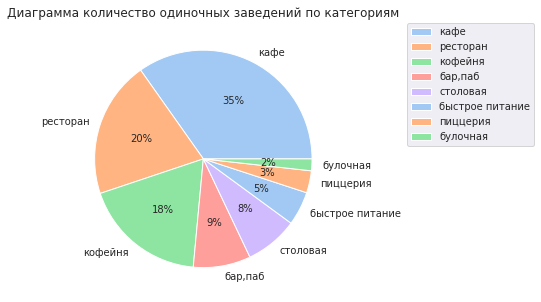

In [45]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(x=table_street_1_category['count'], labels = table_street_1_category['category'], 
        colors = colors, autopct='%.0f%%')
plt.legend()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad= 0)
plt.title('Диаграмма количество одиночных заведений по категориям')
plt.show();

В большинстве случаев одиночными заведениями являются кафе. Чуть реже это рестораны и кофейни. Улицы, на которых находится всего одно заведение, примерно равномерно распределены на карте Москвы. Так же можно заметить, что одиночные кофейни чаще распологаются на более коротких улицах.

**3.12. Посчитаем медиану среднего чека для каждого района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируем цены в центральном административном округе и других. Ответим на вопрос - как удалённость от центра влияет на цены в заведениях?**

In [46]:
middle_avg_bill_df = datasets.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
middle_avg_bill_df['middle_avg_bill'] = round(middle_avg_bill_df['middle_avg_bill'], 3)
middle_avg_bill_df.sort_values(by='middle_avg_bill', ascending=False)

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


In [ ]:
b = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=middle_avg_bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медиана среднего чека по административным округам Москвы',
).add_to(b)

b

[![2023-09-12-21-30-28.png](https://i.postimg.cc/HxcjbRn8/2023-09-12-21-30-28.png)](https://postimg.cc/bDPzh6Qq)

Самыми дорогими округами оказались Центральный и Западный административные округа. Делее по уменьшению цены среднего чека следуют Северо-Западный, Северный, Восточный и Югозападный. Южный, Юго-Восточный, и Северовосточный округа имеют наименьшее значение среднего чека. Удалённость от центра безусловно влияет на сумму чека в заведениях Москвы. Так же можно отметить, что в контексте заведений западная часть Москвы дороже восточной.

**3.13. Вывод по пункту 3.**

* Категории заведений: кафе, ресторан, кофейня, пиццерия, бар/паб, быстрое питание, булочная и столовая. 
* Наибольшее количество заведений приходится категории кафе, ресторанов и кофейнь. 
* Максимальное количество мест соответствует барам, та же ресторанам и кофейням. 
* Больше несетевые заведений, чем сетевых. Но сетевыми чаще случаются кафе, рестораны и кофейни. 
* Особенно популярны в Москве кофейни и пиццерии. Шоколадница, доминос пицца, додо пицца и one price coffee являются самыми распространёнными. 
* В данных представлены 9 административных округов Москвы. Как и следовало предполагать центральный административный округ обладает наибольшим количеством заведений. 
* Преимущество в среднем рейтинге имеют категории баров, пиццерий, ресторанов и кофейне. Наибольший средний рейтинг приходится на Центральный административный округ Москвы. В данном округе больше качественных заведений с хорошим сервисом, что оправдывает отличные оценки. 
* Улицы с наибольшим количеством посадочных мест: Проспект мира, Профсоюзная, Проспект Вернадского и Ленинский проспект. 
* Улиц, на которых располагается всего один объект общепита не так много, всего порядка 6%. 
* По отношению к среднему чеку в заведениях можно сказать что Центральный административный округ обладает самым большим средним чеком. Так же оказалось, что западная часть Москвы дороже восточной.

## 4. Детализация исследования: открытие кофейни.<a id='section_id_4'></a>

**4.1. Ответим на вопросы: Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?**

In [47]:
datasets.query('category == "кофейня"').shape[0]

1413

In [48]:
coffee_house = datasets.query('category == "кофейня"')
coffee_house['district'].value_counts()

Центральный административный округ         428
Северный административный округ            193
Северо-Восточный административный округ    159
Западный административный округ            150
Южный административный округ               131
Восточный административный округ           105
Юго-Западный административный округ         96
Юго-Восточный административный округ        89
Северо-Западный административный округ      62
Name: district, dtype: int64

In [ ]:
c = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
marker_cluster = MarkerCluster().add_to(c)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']}",
    ).add_to(marker_cluster)

coffee_house.apply(create_clusters, axis=1)

c

[![2023-09-12-21-32-48.png](https://i.postimg.cc/qRVHZ5Q3/2023-09-12-21-32-48.png)](https://postimg.cc/mcwnPVvL)

Кофеен в Москве достаточно много. 1.413 позиций из нашего датасета приходится на кофейни. Больше всего кофеен находится в центре. Расположение в центре примерно равномерное. Чаще всего такие заведения находятся у набережной, недалеко от метро, на пересрёстках улиц, у торговых и бизнес центров. Так же запад Москвы обладает большим количеством кофеен, чем восток.

**4.2. Определим есть ли круглосуточные кофейни.**

In [49]:
print('Количество круглосуточных кофеен:', coffee_house[coffee_house['is_24/7'] == True].shape[0])
print('Процент круглосуточных кофеен от общего количества кофеен:', 
      round(coffee_house[coffee_house['is_24/7'] == True].shape[0]/datasets.query('category == "кофейня"').shape[0]*100, 2), '%')

Количество круглосуточных кофеен: 59
Процент круглосуточных кофеен от общего количества кофеен: 4.18 %


Круглосуточных кофеен не так много.

**4.3. Какие у кофеен рейтинги? Как они распределяются по районам?**

In [50]:
coffee_house.groupby('district').agg({'rating':'mean'}).sort_values(by='rating', ascending=False)

,rating
district,
Центральный административный округ,4.336449
Северо-Западный административный округ,4.325806
Северный административный округ,4.291710
Юго-Западный административный округ,4.283333
Восточный административный округ,4.282857
Южный административный округ,4.232824
Юго-Восточный административный округ,4.225843
Северо-Восточный административный округ,4.216981
Западный административный округ,4.195333


In [ ]:
e = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=coffee_house,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен по административным округам Москвы',
).add_to(e)

e

[![2023-09-12-21-35-23.png](https://i.postimg.cc/3wjtYfYp/2023-09-12-21-35-23.png)](https://postimg.cc/nsz41ksc)

Примечательно, что восток и север столицы не отличался большим количеством кофеен, по сравнению с западом, но западные кофейни имеют значительно меньший рейтинг, чем кофейни, находящиеся на востоке и северовостоке. Так же центр не обладает высоким рейтингом, как это было для всех заведений. 

**4.4. Ответим на вопрос - на какую стоимость чашки капучино стоит ориентироваться при открытии и почему?**

In [51]:
coffee_house['middle_coffee_cup'].describe()

count    521.000000
mean     172.545106
std       65.816633
min       60.000000
25%      124.000000
50%      170.000000
75%      225.000000
max      375.000000
Name: middle_coffee_cup, dtype: float64

По данным датасета можно сказать, что при цене на чашку капучино в 170-200 рублей будет ориентация на средний сегмент населения. Так же стоит отметить, что если кофейня будет распологаться у торговых центров и бизнес центров с средней заработной платой в 30тыс рублей, то цена чашки капучино будет иметь вес. А если распологаться у бизнесцентров с средней заработной платой работников в 150тыс рублей или в дорогих районах Москвы, то цена не будет иметь большого значения, так как качество кофе выйдет на первый план.

## 5. Презентация.<a id='section_id_5'></a>

Презентация: <https://disk.yandex.ru/i/45j95K67GbMPHw>

## 6. Общий вывод.<a id='section_id_6'></a>

Перед нами стояла задача изучить рынок общественного питания Москвы по представленному датасету с информацией о 8.406 заведениях Москвы. <br>

* **Категории данных.**<br>
Кафе, ресторан, кофейня, пиццерия, бар/паб, быстрое питание, булочная и столовая. 

* **Наибольшее количество заведений.**<br>
Кафе, рестораны и кофейни. 

* **Количество посадочных мест.**<br>
Лидеры -  бары, рестораны и кофйни. 

* **Сетевые/несетевые.**<br>
Заведения общественного питания это чаще несетевая история, чем сетевая. Но сетевые компании могут приносить доход в разы больше, поэтому сетевой рынок представляет наибольший интерес. Кафе, рестораны и кофейни гораздо чаще оказываются сетевыми заведениями. <br>

* **Топ-15 заведений.**<br>
Шоколадница, доминос пицца, додо пицца, one price cofe, яндекс лавка и cofix заняли лидирующие позиции. Относительно категорий в  данных топ-15 представлены кофейни, пиццерии и кафе. 

* **По административным районам.**<br>
Центральный административный округ наиболее популярное место для мест общественного питания, где сосредоточены наиболее высокие оценки заведений и высокие цены. Западный округ имеет оценки, цены и количество заведений выше, чем Восточный.  Наиболее популярные улицы Проспект мира, Профсоюзная улица, Проспект Вернадского и Ленинский проспект. Лидеры категорий по округам по прежнему рестораны, кафе и кофейни.  <br>

**Детализация исследования - открытие кофейни.**<br>
По проведённому анализу можно сказать, что кафе, рестораны и кофейни в Москве пользуются наибольшей популярностью, поэтому открытие кофейни в Москве хорошая идея, хоть и конкуренция большая. Порядка 17% заведений датасета приходится на кофейни. Чаще всего они расположены в центре, на севере и на юго-западе. Круглосуточные кофейни непопулярная история. Мало кто захочет пить кофе на ночь, плюс круглосуточные заведения требуют больше расходов на зарплату персонала, так как переплачивают за ночные часы. В нашем анализе центральный и западные округа показывали лучшие показатели по сравнению с востоком, но в разрезе кофеен ситуация имеет ровно противоположный исход, учитывая, что запад проигрывает по количеству данных заведений.  Чашка капучино может варьироваться от 60 до 375 рублей, но цена напрямую может зависеть от расположения, стилистики и ориентации кофейни.  <br>

В результате можно сделать предположение, что открытие кофейни это риск, но проведя хороший анализ можно открыть хороший сетевой сервис данной категории. Восток Москвы сильно себя зарекомендовал. Люди ходят в наиболее полюбившиеся кофейни и вряд ли предпочтут что-то новое. Центр и запад имеет большое количество  кофеен, но они низкого рейтинга. Торговые  и бизнес центры с хорошими аналитическими данными, большими зарплатами работников и на популярных улицах наиболее благоприятная почва для сетевого бизнеса в сфере кофеен. Так же такая ориентация позволит углубиться в качество продукта, не боясь поставить высокую цену за него. Для более конкретного анализа интересно посмотреть на проходимость мест, аналитику торговых и бизнес центров и наличие арендных помещений.